# DECISION TREE

In [1]:
# standard ds imports
import numpy as np
import pandas as pd

# for wrangling and exploration
import acquire
import prepare
import explore

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# for statistical analysis
import scipy.stats as stats

# for model evaluation
import sklearn.metrics as met
from sklearn.tree import DecisionTreeClassifier, plot_tree

### Titanic Dataset:

In [2]:
titanic = acquire.get_titanic_data()
titanic = prepare.prep_titanic(titanic)
train, val, test = prepare.split_data(titanic, 'survived')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 455 to 496
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             534 non-null    int64  
 1   survived                 534 non-null    int64  
 2   pclass                   534 non-null    int64  
 3   sibsp                    534 non-null    int64  
 4   parch                    534 non-null    int64  
 5   fare                     534 non-null    float64
 6   alone                    534 non-null    int64  
 7   sex_male                 534 non-null    uint8  
 8   embark_town_Queenstown   534 non-null    uint8  
 9   embark_town_Southampton  534 non-null    uint8  
dtypes: float64(1), int64(6), uint8(3)
memory usage: 34.9 KB


#### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [3]:
# baseline is 100% not surviving due to it being the mode for the survived feature
baseline = train.survived.mode()
baseline_train = baseline.tolist()*train.shape[0]
baseline_val = baseline.tolist()*val.shape[0]
baseline_test = baseline.tolist()*test.shape[0]

In [4]:
pd.DataFrame(met.classification_report(train.survived, baseline_train, output_dict=True))

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,accuracy,macro avg,weighted avg
precision,0.616105,0.0,0.616105,0.308052,0.379585
recall,1.000000,0.0,0.616105,0.500000,0.616105
f1-score,0.762457,0.0,0.616105,0.381228,0.469753
support,329.000000,205.0,0.616105,534.000000,534.000000


#### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [5]:
y_train = train.survived
X_train = train.drop(columns=['survived', 'passenger_id'])
X_train.shape, y_train.shape

((534, 8), (534,))

In [6]:
X_val = val.drop(columns=['survived','passenger_id'])
y_val = val.survived
X_test = test.drop(columns=['survived','passenger_id'])
y_test = test.survived

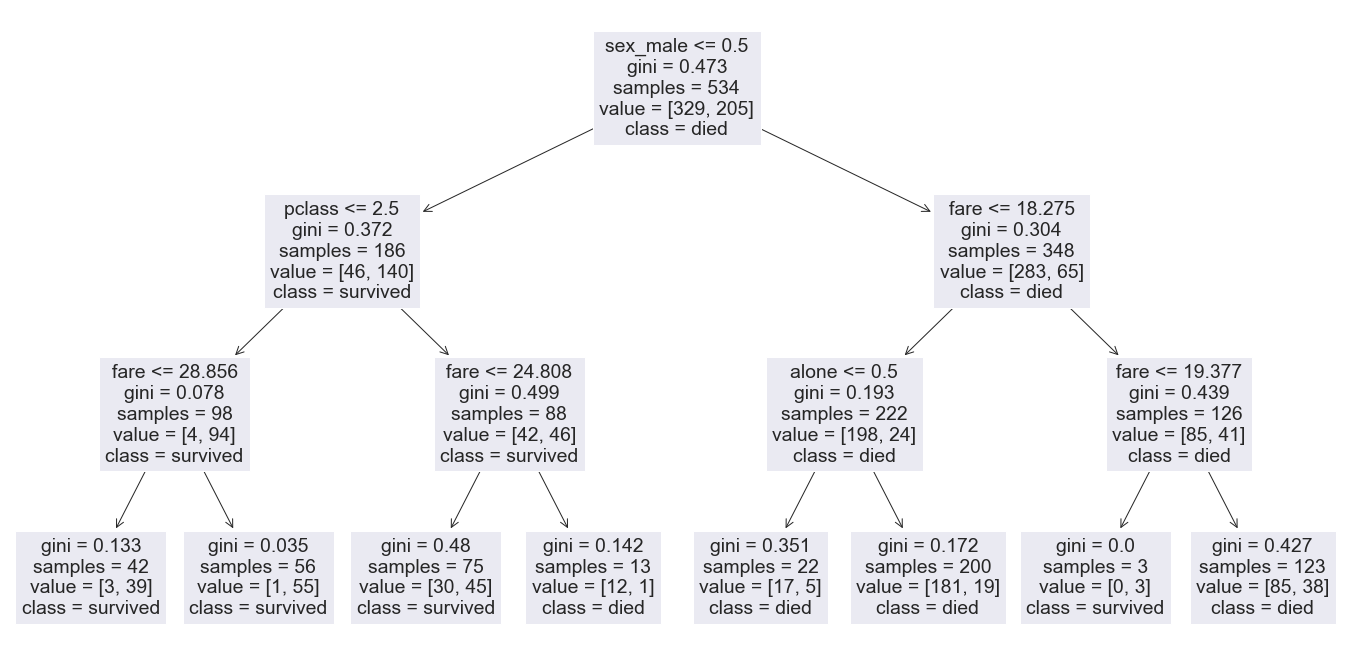

In [8]:
model1 = DecisionTreeClassifier(max_depth=3)
model1.fit(X_train, y_train)
plt.figure(figsize=(24,12))
plot_tree(model1, feature_names=X_train.columns.to_list(), class_names=['died','survived'])
plt.show()

#### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [9]:
print(f'training score: {model1.score(X_train, y_train):.2%}')

training score: 81.84%


In [10]:
pd.DataFrame(met.classification_report(train.survived, model1.predict(X_train), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.824022,0.806818,0.818352,0.815420,0.817418
recall,0.896657,0.692683,0.818352,0.794670,0.818352
f1-score,0.858806,0.745407,0.818352,0.802107,0.815273
support,329.000000,205.000000,0.818352,534.000000,534.000000


#### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [11]:
TP = ((train.survived == 1) & (model1.predict(X_train) == 1)).sum()
FP = ((train.survived == 0) & (model1.predict(X_train) == 1)).sum()
TN = ((train.survived == 0) & (model1.predict(X_train) == 0)).sum()
FN = ((train.survived == 1) & (model1.predict(X_train) == 0)).sum()

print(f'accuracy: {met.accuracy_score(train.survived, model1.predict(X_train)):.2%}')
print(f'true positive rate / recall: {met.recall_score(train.survived, model1.predict(X_train)):.2%}')
print(f'true negative rate / Specificity: {(TN)/(FP+TN):.2%}')
print(f'false potivie rate / Percision: {met.precision_score(train.survived, model1.predict(X_train)):.2%}')
print(f'false negative rate: {(TN)/(TN+FN):.2%}')
print(f'f1-score: {met.f1_score(train.survived, model1.predict(X_train)):.2%}')
print(f'support: {model1.predict(X_train).sum()}')

accuracy: 81.84%
true positive rate / recall: 69.27%
true negative rate / Specificity: 89.67%
false potivie rate / Percision: 80.68%
false negative rate: 82.40%
f1-score: 74.54%
support: 176


#### 5. Run through steps 2-4 using a different max_depth value.

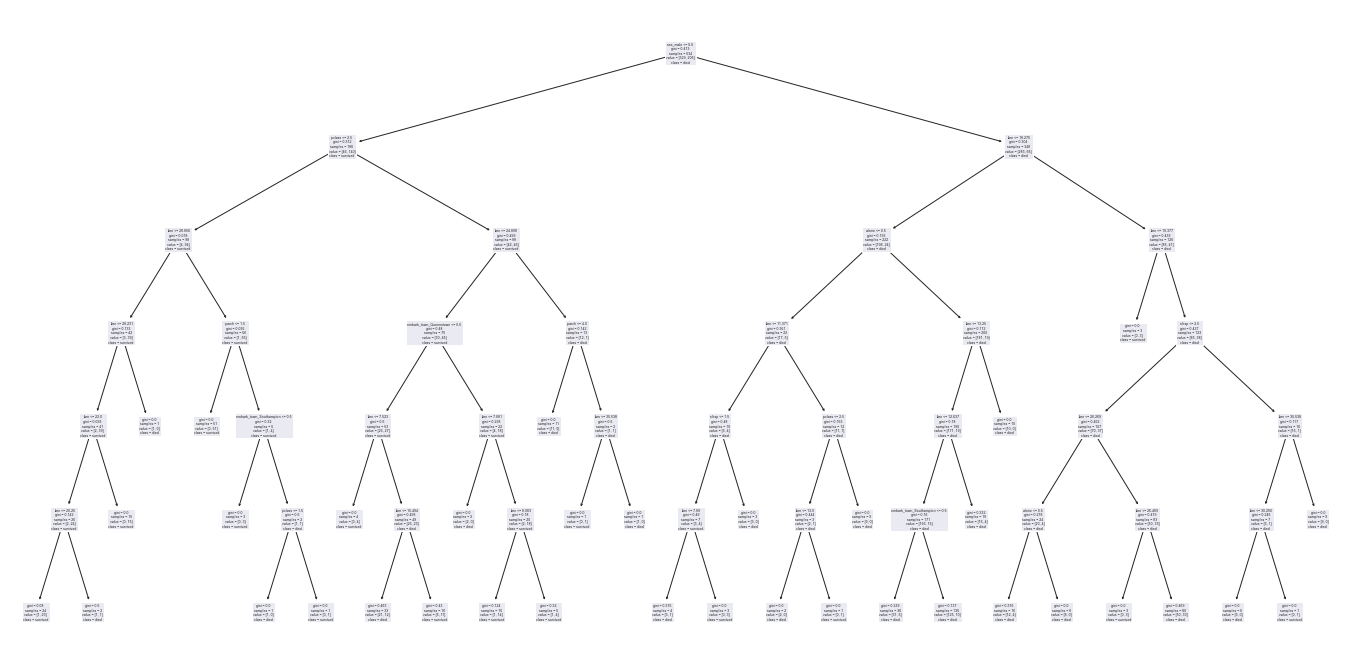

In [12]:
model2 = DecisionTreeClassifier(max_depth=6)
model2.fit(X_train, y_train)
plt.figure(figsize=(24,12))
plot_tree(model2, feature_names=X_train.columns.to_list(), class_names=['died','survived'])
plt.show()

In [13]:
print(f'training score: {model2.score(X_train, y_train):.2%}')

training score: 85.96%


In [14]:
pd.DataFrame(met.classification_report(train.survived, model2.predict(X_train), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.827320,0.945205,0.859551,0.886263,0.872575
recall,0.975684,0.673171,0.859551,0.824427,0.859551
f1-score,0.895397,0.786325,0.859551,0.840861,0.853525
support,329.000000,205.000000,0.859551,534.000000,534.000000


In [15]:
TP = ((train.survived == 1) & (model2.predict(X_train) == 1)).sum()
FP = ((train.survived == 0) & (model2.predict(X_train) == 1)).sum()
TN = ((train.survived == 0) & (model2.predict(X_train) == 0)).sum()
FN = ((train.survived == 1) & (model2.predict(X_train) == 0)).sum()

print(f'accuracy: {met.accuracy_score(train.survived, model2.predict(X_train)):.2%}')
print(f'true positive rate / recall: {met.recall_score(train.survived, model2.predict(X_train)):.2%}')
print(f'true negative rate / Specificity: {(TN)/(FP+TN):.2%}')
print(f'false potivie rate / Percision: {met.precision_score(train.survived, model2.predict(X_train)):.2%}')
print(f'false negative rate: {(TN)/(TN+FN):.2%}')
print(f'f1-score: {met.f1_score(train.survived, model2.predict(X_train)):.2%}')
print(f'support: {model2.predict(X_train).sum()}')

accuracy: 85.96%
true positive rate / recall: 67.32%
true negative rate / Specificity: 97.57%
false potivie rate / Percision: 94.52%
false negative rate: 82.73%
f1-score: 78.63%
support: 146


#### 6. Which model performs better on your in-sample data?

In [16]:
print(f'Model 1 Accuracy: {met.accuracy_score(train.survived, model1.predict(X_train)):.2%}')
print(f'Model 2 Accuracy: {met.accuracy_score(train.survived, model2.predict(X_train)):.2%}')
print(f'Baseline Accuracy: {met.accuracy_score(train.survived, baseline_train):.2%}')

Model 1 Accuracy: 81.84%
Model 2 Accuracy: 85.96%
Baseline Accuracy: 61.61%


In [17]:
# Model 2 performs better on the train dataset

#### 7. Which model performs best on your out-of-sample data, the validate set?

In [18]:
print(f'Model 1 Accuracy: {met.accuracy_score(val.survived, model1.predict(X_val)):.2%}')
print(f'Model 2 Accuracy: {met.accuracy_score(val.survived, model2.predict(X_val)):.2%}')
print(f'Baseline Accuracy: {met.accuracy_score(val.survived, baseline_val):.2%}')

Model 1 Accuracy: 79.21%
Model 2 Accuracy: 77.53%
Baseline Accuracy: 61.80%


In [19]:
# Model 1 perfoms better on the validate dataset

### Telco Dataset:

In [20]:
telco = acquire.get_telco_data()
telco = prepare.prep_telco(telco)
train, val, test = prepare.split_data(telco, 'churn_Yes')

#### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [21]:
baseline = train.churn_Yes.mode()
baseline_train = baseline.tolist()*train.shape[0]
baseline_val = baseline.tolist()*val.shape[0]
baseline_test = baseline.tolist()*test.shape[0]
pd.DataFrame(met.classification_report(train.churn_Yes, baseline_train, output_dict=True))

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,accuracy,macro avg,weighted avg
precision,0.734675,0.0,0.734675,0.367337,0.539747
recall,1.000000,0.0,0.734675,0.500000,0.734675
f1-score,0.847046,0.0,0.734675,0.423523,0.622303
support,3104.000000,1121.0,0.734675,4225.000000,4225.000000


#### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [22]:
X_train = train.drop(columns=['churn_Yes', 'customer_id'])
y_train = train.churn_Yes
X_val = val.drop(columns=['churn_Yes', 'customer_id'])
y_val = val.churn_Yes
X_test = test.drop(columns=['churn_Yes', 'customer_id'])
y_test = test.churn_Yes

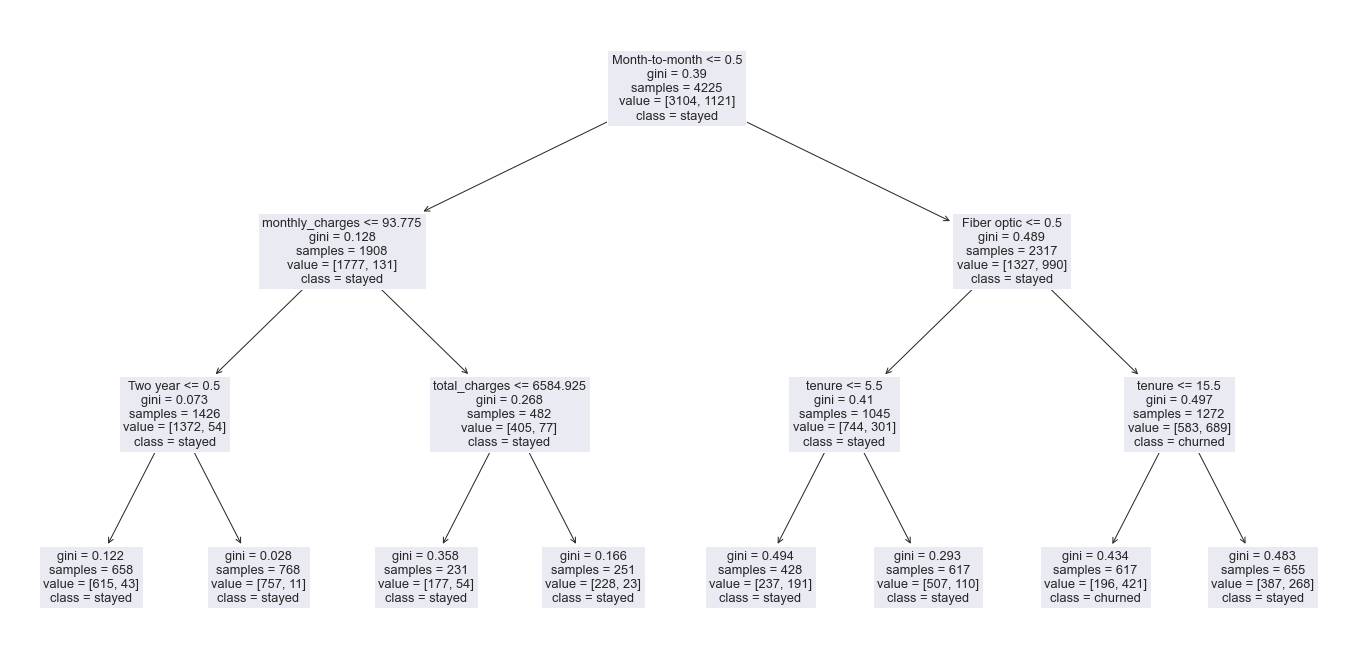

In [23]:
model1 = DecisionTreeClassifier(max_depth=3)
model1.fit(X_train, y_train)
plt.figure(figsize=(24,12))
plot_tree(model1, feature_names=X_train.columns.to_list(), class_names=['stayed','churned'])
plt.show()

#### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [24]:
model1.score(X_train, y_train)

0.7879289940828402

In [25]:
pd.DataFrame(met.classification_report(train.churn_Yes, model1.predict(X_train), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.805987,0.682334,0.787929,0.744160,0.773178
recall,0.936856,0.375558,0.787929,0.656207,0.787929
f1-score,0.866508,0.484465,0.787929,0.675486,0.765142
support,3104.000000,1121.000000,0.787929,4225.000000,4225.000000


#### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [26]:
TP = ((train.churn_Yes == 1) & (model1.predict(X_train) == 1)).sum()
FP = ((train.churn_Yes == 0) & (model1.predict(X_train) == 1)).sum()
TN = ((train.churn_Yes == 0) & (model1.predict(X_train) == 0)).sum()
FN = ((train.churn_Yes == 1) & (model1.predict(X_train) == 0)).sum()

print(f'accuracy: {met.accuracy_score(train.churn_Yes, model1.predict(X_train)):.2%}')
print(f'true positive rate / recall: {met.recall_score(train.churn_Yes, model1.predict(X_train)):.2%}')
print(f'true negative rate / Specificity: {(TN)/(FP+TN):.2%}')
print(f'false potivie rate / Percision: {met.precision_score(train.churn_Yes, model1.predict(X_train)):.2%}')
print(f'false negative rate: {(TN)/(TN+FN):.2%}')
print(f'f1-score: {met.f1_score(train.churn_Yes, model1.predict(X_train)):.2%}')
print(f'support: {model1.predict(X_train).sum()}')

accuracy: 78.79%
true positive rate / recall: 37.56%
true negative rate / Specificity: 93.69%
false potivie rate / Percision: 68.23%
false negative rate: 80.60%
f1-score: 48.45%
support: 617


#### 5. Run through steps 2-4 using a different max_depth value.

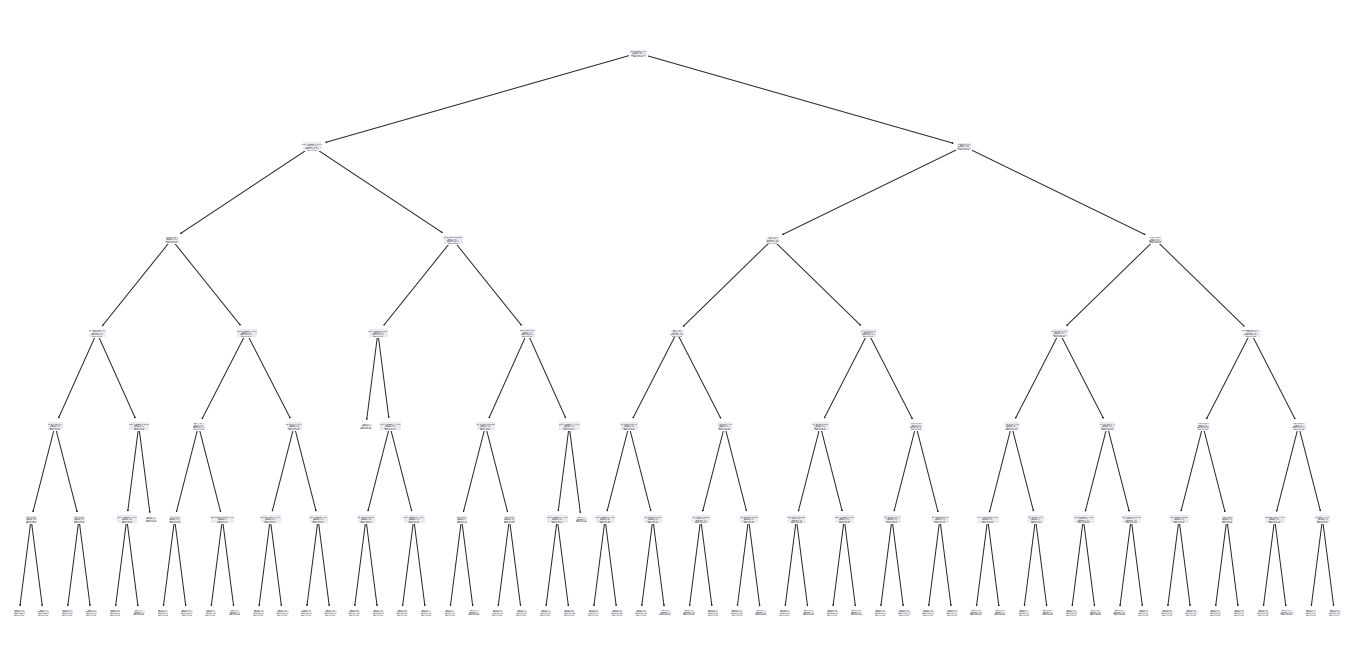

In [27]:
model2 = DecisionTreeClassifier(max_depth=6)
model2.fit(X_train, y_train)
plt.figure(figsize=(24,12))
plot_tree(model2, feature_names=X_train.columns.to_list(), class_names=['stayed','churned'])
plt.show()

In [28]:
pd.DataFrame(met.classification_report(train.churn_Yes, model2.predict(X_train), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.856440,0.672840,0.814201,0.764640,0.807726
recall,0.897552,0.583408,0.814201,0.740480,0.814201
f1-score,0.876514,0.624940,0.814201,0.750727,0.809765
support,3104.000000,1121.000000,0.814201,4225.000000,4225.000000


In [29]:
TP = ((train.churn_Yes == 1) & (model1.predict(X_train) == 1)).sum()
FP = ((train.churn_Yes == 0) & (model1.predict(X_train) == 1)).sum()
TN = ((train.churn_Yes == 0) & (model1.predict(X_train) == 0)).sum()
FN = ((train.churn_Yes == 1) & (model1.predict(X_train) == 0)).sum()

print(f'accuracy: {met.accuracy_score(train.churn_Yes, model1.predict(X_train)):.2%}')
print(f'true positive rate / recall: {met.recall_score(train.churn_Yes, model1.predict(X_train)):.2%}')
print(f'true negative rate / Specificity: {(TN)/(FP+TN):.2%}')
print(f'false potivie rate / Percision: {met.precision_score(train.churn_Yes, model1.predict(X_train)):.2%}')
print(f'false negative rate: {(TN)/(TN+FN):.2%}')
print(f'f1-score: {met.f1_score(train.churn_Yes, model1.predict(X_train)):.2%}')
print(f'support: {model1.predict(X_train).sum()}')

accuracy: 78.79%
true positive rate / recall: 37.56%
true negative rate / Specificity: 93.69%
false potivie rate / Percision: 68.23%
false negative rate: 80.60%
f1-score: 48.45%
support: 617


#### 6. Which model performs better on your in-sample data?

In [30]:
print(f'Model 1 Accuracy: {met.accuracy_score(train.churn_Yes, model1.predict(X_train)):.2%}')
print(f'Model 2 Accuracy: {met.accuracy_score(train.churn_Yes, model2.predict(X_train)):.2%}')
print(f'Baseline Accuracy: {met.accuracy_score(train.churn_Yes, baseline_train):.2%}')

Model 1 Accuracy: 78.79%
Model 2 Accuracy: 81.42%
Baseline Accuracy: 73.47%


In [31]:
# Model 2 performs better with train dataset

#### 7. Which model performs best on your out-of-sample data, the validate set?

In [32]:
print(f'Model 1 Accuracy: {met.accuracy_score(val.churn_Yes, model1.predict(X_val)):.2%}')
print(f'Model 2 Accuracy: {met.accuracy_score(val.churn_Yes, model2.predict(X_val)):.2%}')
print(f'Baseline Accuracy: {met.accuracy_score(val.churn_Yes, baseline_val):.2%}')

Model 1 Accuracy: 79.28%
Model 2 Accuracy: 79.84%
Baseline Accuracy: 73.46%


In [33]:
# Model 2 performs better with validate dataset